# Explainability - SHAP Values

In [ ]:
import shap

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

datos = load_breast_cancer()
X, y = datos.data, datos.target

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
explicador = shap.Explainer(model,X_train)

In [ ]:
valores_shap = explicador.shap_values(X_test)

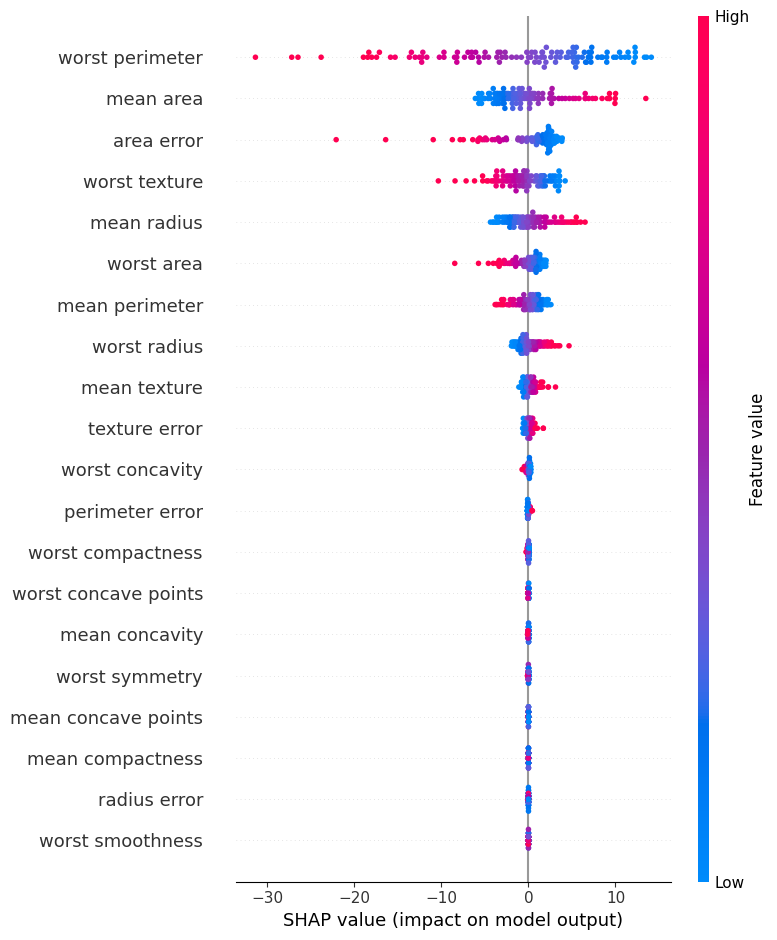

In [ ]:
shap.summary_plot(valores_shap,X_test,feature_names=datos.feature_names)

## Case Study

In [ ]:
import pandas as pd
import shap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

data_url = "https://raw.githubusercontent.com/dphi-official/Datasets/master/Loan_Data/loan_train.csv"
df = pd.read_csv(data_url,index_col=0)

In [ ]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002305,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1
1,LP001715,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,1
2,LP002086,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0
3,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,1
4,LP002529,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,1
487,LP001790,Female,No,1,Graduate,No,3812,0.0,112.0,360.0,1.0,Rural,1
488,LP001401,Male,Yes,1,Graduate,No,14583,0.0,185.0,180.0,1.0,Rural,1
489,LP002893,Male,No,0,Graduate,No,1836,33837.0,90.0,360.0,1.0,Urban,0


In [ ]:
df.drop(columns=["Loan_ID","Property_Area"],inplace=True)
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Married'] = df['Married'].map({'Yes': 1, 'No': 0})
df['Education'] = df['Education'].map({'Graduate': 1, 'Not Graduate': 0})
df['Self_Employed'] = df['Self_Employed'].map({'Yes': 1, 'No': 0})
df['Dependents'] = df['Dependents'].map({'0': 0, '1': 1, '2': 2, '3+': 3})
df.dropna(inplace=True)

In [ ]:
X = df.drop(columns=["Loan_Status"])
y = df["Loan_Status"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [ ]:
lr_model = LogisticRegression(max_iter=3000)
lr_model.fit(X_train, y_train)

lr_preds = lr_model.predict(X_test)
print(classification_report(y_test, lr_preds))

              precision    recall  f1-score   support

           0       0.67      0.30      0.41        20
           1       0.79      0.95      0.86        57

    accuracy                           0.78        77
   macro avg       0.73      0.62      0.64        77
weighted avg       0.76      0.78      0.75        77



In [ ]:
explicador = shap.Explainer(lr_model,X_train)